# Keras TF 2.0 -  Classification Project

Classification task with Keras API for TF 2.0

## The Data

### Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        - class:
                - WDBC-Malignant
                - WDBC-Benign

    :Summary Statistics:

    ===================================== ====== ======
                                           Min    Max
    ===================================== ====== ======
    radius (mean):                        6.981  28.11
    texture (mean):                       9.71   39.28
    perimeter (mean):                     43.79  188.5
    area (mean):                          143.5  2501.0
    smoothness (mean):                    0.053  0.163
    compactness (mean):                   0.019  0.345
    concavity (mean):                     0.0    0.427
    concave points (mean):                0.0    0.201
    symmetry (mean):                      0.106  0.304
    fractal dimension (mean):             0.05   0.097
    radius (standard error):              0.112  2.873
    texture (standard error):             0.36   4.885
    perimeter (standard error):           0.757  21.98
    area (standard error):                6.802  542.2
    smoothness (standard error):          0.002  0.031
    compactness (standard error):         0.002  0.135
    concavity (standard error):           0.0    0.396
    concave points (standard error):      0.0    0.053
    symmetry (standard error):            0.008  0.079
    fractal dimension (standard error):   0.001  0.03
    radius (worst):                       7.93   36.04
    texture (worst):                      12.02  49.54
    perimeter (worst):                    50.41  251.2
    area (worst):                         185.2  4254.0
    smoothness (worst):                   0.071  0.223
    compactness (worst):                  0.027  1.058
    concavity (worst):                    0.0    1.252
    concave points (worst):               0.0    0.291
    symmetry (worst):                     0.156  0.664
    fractal dimension (worst):            0.055  0.208
    ===================================== ====== ======

    :Missing Attribute Values: None

    :Class Distribution: 212 - Malignant, 357 - Benign

    :Creator:  Dr. William H. Wolberg, W. Nick Street, Olvi L. Mangasarian

    :Donor: Nick Street

    :Date: November, 1995

This is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets.
https://goo.gl/U2Uwz2

Features are computed from a digitized image of a fine needle
aspirate (FNA) of a breast mass.  They describe
characteristics of the cell nuclei present in the image.

Separating plane described above was obtained using
Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree
Construction Via Linear Programming." Proceedings of the 4th
Midwest Artificial Intelligence and Cognitive Science Society,
pp. 97-101, 1992], a classification method which uses linear
programming to construct a decision tree.  Relevant features
were selected using an exhaustive search in the space of 1-4
features and 1-3 separating planes.

The actual linear program used to obtain the separating plane
in the 3-dimensional space is that described in:
[K. P. Bennett and O. L. Mangasarian: "Robust Linear
Programming Discrimination of Two Linearly Inseparable Sets",
Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:

ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

.. topic:: References

   - W.N. Street, W.H. Wolberg and O.L. Mangasarian. Nuclear feature extraction 
     for breast tumor diagnosis. IS&T/SPIE 1993 International Symposium on 
     Electronic Imaging: Science and Technology, volume 1905, pages 861-870,
     San Jose, CA, 1993.
   - O.L. Mangasarian, W.N. Street and W.H. Wolberg. Breast cancer diagnosis and 
     prognosis via linear programming. Operations Research, 43(4), pages 570-577, 
     July-August 1995.
   - W.H. Wolberg, W.N. Street, and O.L. Mangasarian. Machine learning techniques
     to diagnose breast cancer from fine-needle aspirates. Cancer Letters 77 (1994) 
     163-171.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('cancer_classification.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


## EDA

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

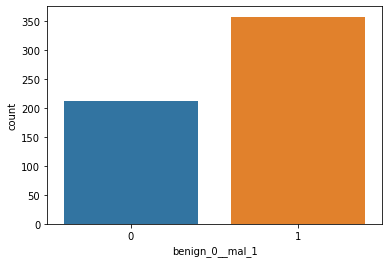

In [7]:
# A countlot of the instances under each label to see if the problem is well balanced
sns.countplot(x='benign_0__mal_1',data=df)

**Checking Correlation between features**

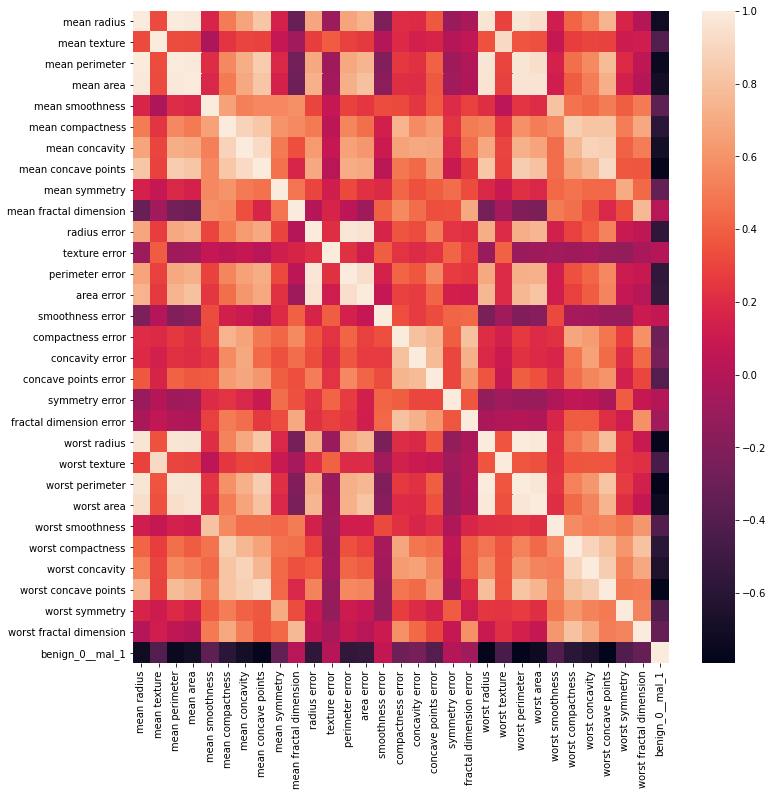

In [15]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr())

In [14]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

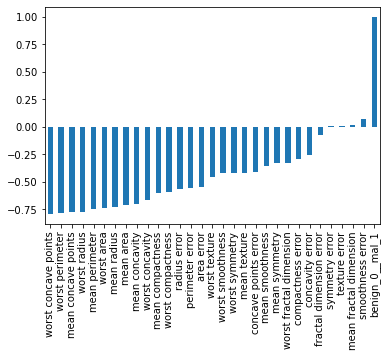

In [16]:
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

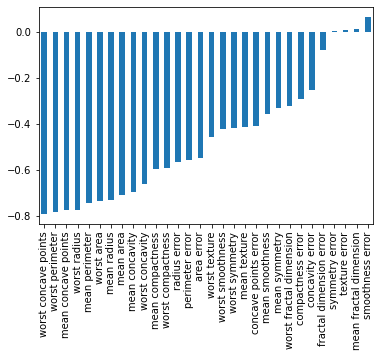

In [17]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

## Train Test Split

In [21]:
# .values to transform X to a np array for neural network training
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)


## Scaling Data

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
scaler = MinMaxScaler()

In [24]:
scaler.fit(X_train)

MinMaxScaler()

In [25]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Creating the Model

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
                  

In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [27]:
X_train.shape

(426, 30)

In [28]:
model = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

model.add(Dense(units=30,activation='relu'))

model.add(Dense(units=15,activation='relu'))


model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

## Training the Model 

### Trial One: Choosing too many epochs and overfitting!

In [29]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1
          )

Epoch 1/600
14/14 [==============================] - 1s 52ms/step - loss: 0.7676 - val_loss: 0.7044
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6845 - val_loss: 0.6621
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6591 - val_loss: 0.6293
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6239 - val_loss: 0.5907
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5784 - val_loss: 0.5465
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5381 - val_loss: 0.4996
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4945 - val_loss: 0.4517
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4483 - val_loss: 0.4065
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3961 - val_loss: 0.3621
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3561 - val_loss: 0.3265
Epoch 11

14/14 [==============================] - 0s 3ms/step - loss: 0.0440 - val_loss: 0.1056
Epoch 83/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0645 - val_loss: 0.1087
Epoch 84/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0596 - val_loss: 0.1113
Epoch 85/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0680 - val_loss: 0.1096
Epoch 86/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0724 - val_loss: 0.1067
Epoch 87/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0414 - val_loss: 0.1167
Epoch 88/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0681 - val_loss: 0.1091
Epoch 89/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0506 - val_loss: 0.1237
Epoch 90/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0457 - val_loss: 0.1079
Epoch 91/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0464 - val_loss: 0.1139
Epoch 92/600


14/14 [==============================] - 0s 3ms/step - loss: 0.0413 - val_loss: 0.1254
Epoch 163/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0370 - val_loss: 0.1375
Epoch 164/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0604 - val_loss: 0.1262
Epoch 165/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0411 - val_loss: 0.1386
Epoch 166/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0260 - val_loss: 0.1274
Epoch 167/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0371 - val_loss: 0.1279
Epoch 168/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0480 - val_loss: 0.1282
Epoch 169/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0378 - val_loss: 0.1366
Epoch 170/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0347 - val_loss: 0.1326
Epoch 171/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0443 - val_loss: 0.1291
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0254 - val_loss: 0.1584
Epoch 244/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0643 - val_loss: 0.1343
Epoch 245/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0391 - val_loss: 0.1526
Epoch 246/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0418 - val_loss: 0.1330
Epoch 247/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0324 - val_loss: 0.1509
Epoch 248/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0362 - val_loss: 0.1618
Epoch 249/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0314 - val_loss: 0.1411
Epoch 250/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0369 - val_loss: 0.1577
Epoch 251/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0237 - val_loss: 0.1471
Epoch 252/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0310 - val_loss: 0.1449
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0188 - val_loss: 0.1436
Epoch 325/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0286 - val_loss: 0.1573
Epoch 326/600
14/14 [==============================] - ETA: 0s - loss: 0.027 - 0s 3ms/step - loss: 0.0205 - val_loss: 0.1626
Epoch 327/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0284 - val_loss: 0.1630
Epoch 328/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0181 - val_loss: 0.1682
Epoch 329/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0247 - val_loss: 0.1547
Epoch 330/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0237 - val_loss: 0.1709
Epoch 331/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0182 - val_loss: 0.1550
Epoch 332/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0312 - val_loss: 0.1660
Epoch 333/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0225

Epoch 405/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0230 - val_loss: 0.1754
Epoch 406/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0198 - val_loss: 0.1796
Epoch 407/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0161 - val_loss: 0.1764
Epoch 408/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0199 - val_loss: 0.1850
Epoch 409/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0160 - val_loss: 0.1774
Epoch 410/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0117 - val_loss: 0.1710
Epoch 411/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0168 - val_loss: 0.1828
Epoch 412/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0151 - val_loss: 0.1659
Epoch 413/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0241 - val_loss: 0.1857
Epoch 414/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0166 - val_los

14/14 [==============================] - 0s 3ms/step - loss: 0.0189 - val_loss: 0.1937
Epoch 486/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0146 - val_loss: 0.1860
Epoch 487/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0120 - val_loss: 0.2020
Epoch 488/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0139 - val_loss: 0.1776
Epoch 489/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0189 - val_loss: 0.1938
Epoch 490/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0115 - val_loss: 0.2196
Epoch 491/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0184 - val_loss: 0.1637
Epoch 492/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0098 - val_loss: 0.2400
Epoch 493/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0152 - val_loss: 0.1895
Epoch 494/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0109 - val_loss: 0.1817
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0089 - val_loss: 0.1869
Epoch 567/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0129 - val_loss: 0.2105
Epoch 568/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0085 - val_loss: 0.2487
Epoch 569/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0127 - val_loss: 0.1925
Epoch 570/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0092 - val_loss: 0.2263
Epoch 571/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0081 - val_loss: 0.2011
Epoch 572/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0102 - val_loss: 0.2066
Epoch 573/600
14/14 [==============================] - ETA: 0s - loss: 0.004 - 0s 3ms/step - loss: 0.0066 - val_loss: 0.2165
Epoch 574/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0096 - val_loss: 0.2254
Epoch 575/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0095

*model.history.history*

In [30]:
model_loss = pd.DataFrame(model.history.history)

*model_loss*

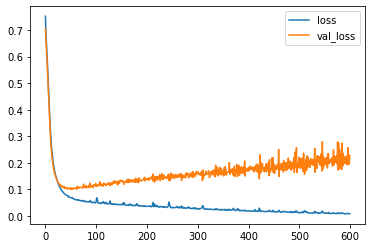

In [31]:
model_loss.plot()

*Training loss decreasing while validation loss starts to encrease at some point during training.*
*A characteristics of overfitting due to many epoch.*

## Trial Two: Using Early Stopping

**Using early stopping to track the val_loss and stop training once it begins increasing too much to prevent over training the model!**

In [32]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [33]:
from tensorflow.keras.callbacks import EarlyStopping

In [34]:
#Stop training when a monitored quantity has stopped improving.
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [35]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop] # will trigger early stop
          )

Epoch 1/600
14/14 [==============================] - 0s 11ms/step - loss: 0.6800 - val_loss: 0.6353
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6268 - val_loss: 0.5923
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5841 - val_loss: 0.5483
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5345 - val_loss: 0.4980
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4888 - val_loss: 0.4470
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4386 - val_loss: 0.3980
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4056 - val_loss: 0.3583
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3592 - val_loss: 0.3160
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3240 - val_loss: 0.2856
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3033 - val_loss: 0.2573
Epoch 11

14/14 [==============================] - 0s 3ms/step - loss: 0.0580 - val_loss: 0.0959
Epoch 84/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0416 - val_loss: 0.1036
Epoch 85/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0614 - val_loss: 0.0941
Epoch 86/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0436 - val_loss: 0.0970
Epoch 87/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0366 - val_loss: 0.0970
Epoch 88/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0329 - val_loss: 0.1055
Epoch 89/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0429 - val_loss: 0.1001
Epoch 00089: early stopping


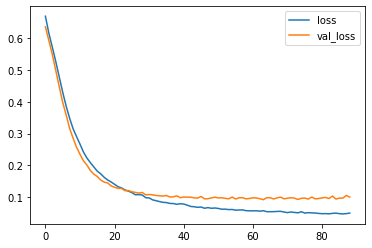

In [36]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

## Trail Three: Adding in DropOut Layers

In [37]:
from tensorflow.keras.layers import Dropout

In [38]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [39]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
14/14 [==============================] - 1s 11ms/step - loss: 0.6745 - val_loss: 0.6604
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6982 - val_loss: 0.6456
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6584 - val_loss: 0.6280
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6337 - val_loss: 0.6103
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6181 - val_loss: 0.5895
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5990 - val_loss: 0.5679
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5868 - val_loss: 0.5471
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5844 - val_loss: 0.5235
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5683 - val_loss: 0.4998
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5700 - val_loss: 0.4796
Epoch 11

Epoch 83/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1367 - val_loss: 0.0984
Epoch 84/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1438 - val_loss: 0.1034
Epoch 85/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0971 - val_loss: 0.0939
Epoch 86/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1056 - val_loss: 0.0897
Epoch 87/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1221 - val_loss: 0.0920
Epoch 88/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1088 - val_loss: 0.0963
Epoch 89/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1034 - val_loss: 0.0897
Epoch 90/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1005 - val_loss: 0.1031
Epoch 91/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1383 - val_loss: 0.0942
Epoch 92/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0989 - val_loss: 0.0901


Epoch 164/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0853 - val_loss: 0.0977
Epoch 165/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1058 - val_loss: 0.0909
Epoch 166/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0886 - val_loss: 0.1039
Epoch 167/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0636 - val_loss: 0.0951
Epoch 168/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0765 - val_loss: 0.0904
Epoch 169/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0689 - val_loss: 0.0956
Epoch 170/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0692 - val_loss: 0.0958
Epoch 171/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1089 - val_loss: 0.0886
Epoch 172/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0871 - val_loss: 0.0916
Epoch 173/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0799 - val_los

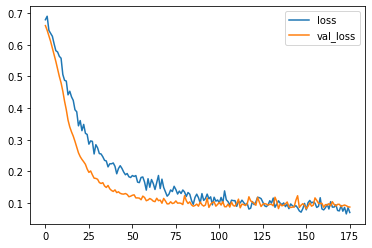

In [40]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

# Model Evaluation

In [45]:
predictions = model.predict_classes(X_test)

In [46]:
from sklearn.metrics import classification_report,confusion_matrix

In [47]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        55
           1       0.99      0.99      0.99        88

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



In [48]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 1 87]]
